<class 'pandas.core.series.Series'>
object


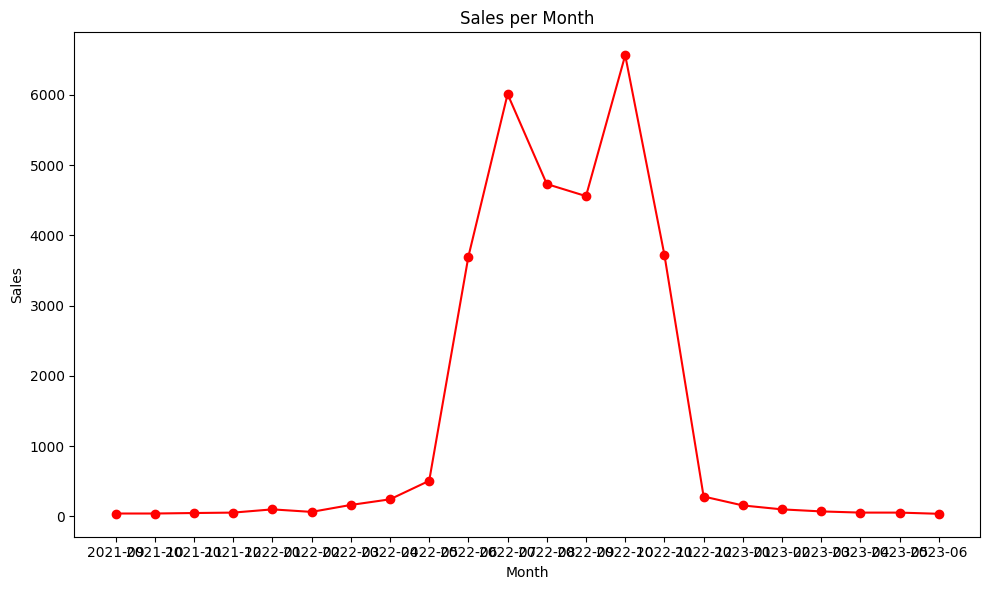

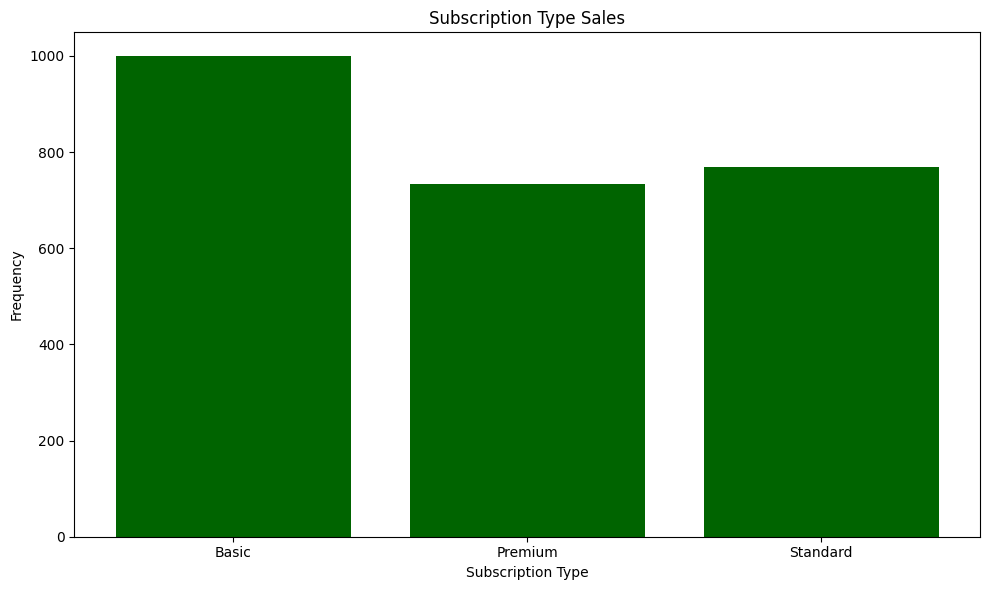

In [79]:
import pandas as pd

data = pd.read_csv (r'C:\Users\Dell\Desktop\Netflix_userbase.csv')
data
#print(data.head())
#print(data.info())
#print(data.isnull().sum())
print(type(data['Join Date']))
print(data['Join Date'].dtype)
data['Join Date']= pd.to_datetime(data['Join Date'], format="%d-%m-%y")
data['Last Payment Date'] =pd.to_datetime(data['Last Payment Date'], format="%d-%m-%y")

substypes = data['Subscription Type'].unique()
substypes
duration = data['Plan Duration'].unique()
duration
price= data['Monthly Revenue'].unique()
price
coba= data[['Subscription Type','Monthly Revenue']].drop_duplicates
coba

#sales per month
data['Month']= data['Join Date'].dt.to_period('M')
monthlysales= data.groupby('Month')['Monthly Revenue'].sum().sort_index()
monthlysales
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(monthlysales.index.astype(str), monthlysales.values, marker='o', color= 'red')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month')
plt.tight_layout()


#subscription type
sub = data['Subscription Type'].value_counts().sort_index()
sub
plt.figure(figsize= (10,6))
plt.bar(sub.index, sub.values, color='darkgreen')
plt.xlabel('Subscription Type')
plt.ylabel('Frequency')
plt.title('Subscription Type Sales')
plt.tight_layout()

<Axes: xlabel='Subscription Type', ylabel='count'>

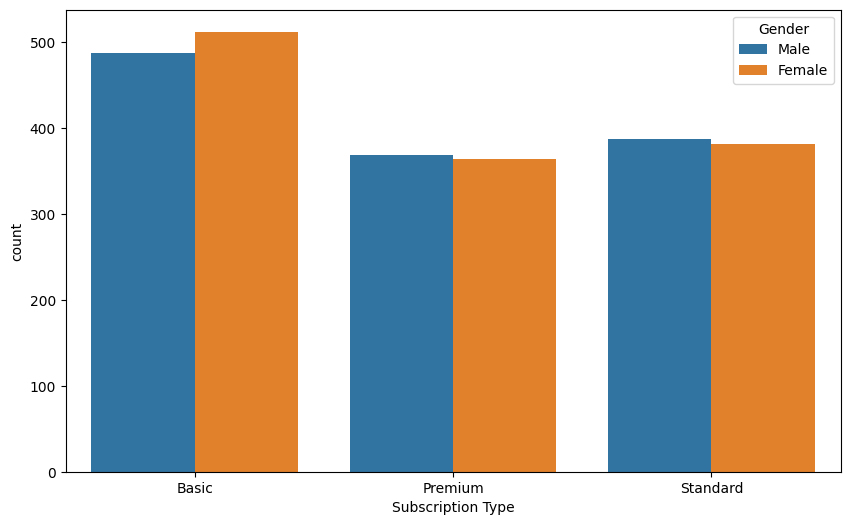

In [84]:
gender=  data.groupby(['Gender','Subscription Type']).size().sort_index()
plt.figure(figsize=(10,6))
import seaborn as sns
sns.countplot(data= data, x='Subscription Type', hue='Gender')

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Month'],
      dtype='object')


Text(0, 0.5, 'Number of Users')

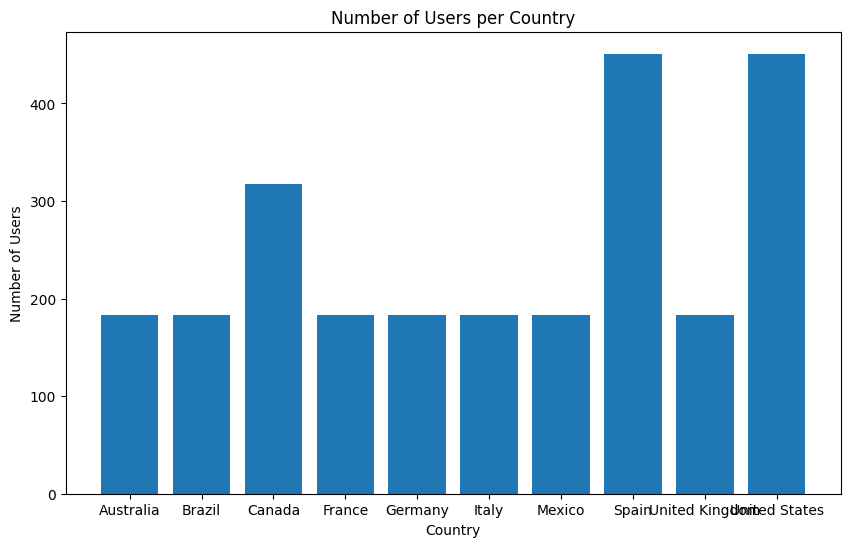

In [102]:
print(data.columns)
user = data.groupby('Country')['User ID'].nunique().sort_index()
user
user= user.rename("Number of Users").reset_index()

plt.figure(figsize= (10,6))
plt.bar(user['Country'], user['Number of Users'])
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel("Number of Users")